In [213]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from scipy.ndimage import gaussian_filter1d

In [198]:
# Windows Clark WS Path
#spike_times = "Z:/Wu_sleep/m1/SD1/20240914_SD1_test_1200_g0/catgt_20240914_SD1_test_1200_g0/20240914_SD1_test_1200_g0_imec0/imec0_ks25/spike_times.npy"
#spike_clusters = "Z:/Wu_sleep/m1/SD1/20240914_SD1_test_1200_g0/catgt_20240914_SD1_test_1200_g0/20240914_SD1_test_1200_g0_imec0/imec0_ks25/spike_clusters.npy"

# mac macAir Path
spike_times_file = "/Users/alexandracheng/Desktop/Harris_Lab/Collab/Wu_Sleep/Wu_Sleep_Data/spike_times.npy"
spike_clusters_file = "/Users/alexandracheng/Desktop/Harris_Lab/Collab/Wu_Sleep/Wu_Sleep_Data/spike_clusters.npy"

# parameters
bin_size = 1500
sample_rate = 30000

sigma = 6

In [190]:
def firing_rate(spike_times_file, spike_clusters_file, bin_size, cluster):
    spike_times = np.load(spike_times_file)
    spike_clusters = np.load(spike_clusters_file)

    if cluster == "all":
        clust_ind = np.unique(spike_clusters)
    else:
        clust_ind = cluster
    t_end = np.max(spike_times)
    t_bins = np.arange(0,t_end,bin_size)
    
    fr = np.zeros((len(clust_ind), len(t_bins)-1))
    for i in range(len(clust_ind)):
        spikes_t_ind = spike_times[np.where(spike_clusters == clust_ind[i])[0]]
        spikes_count, edges = np.histogram(spikes_t_ind, t_bins)

        fr[i,:] = spikes_count

    return fr, t_bins[:-1]

In [261]:
def firing_rate_smooth(fr, sigma):
    fr_smooth = np.zeros(fr.shape)
    for i in range(len(fr_smooth)):
        fr_smooth[i,:] = gaussian_filter1d(fr[i,:], sigma)

    return fr_smooth

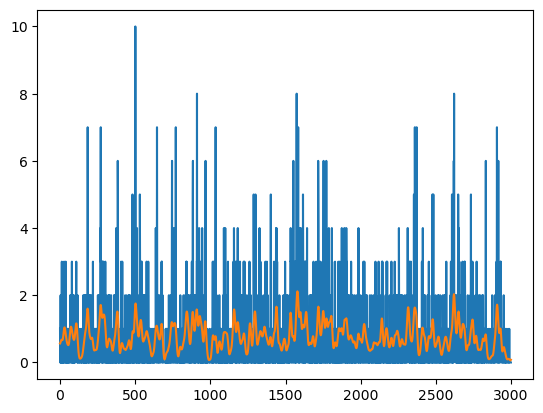

In [263]:
fr, t_bins = firing_rate(spike_times_file, spike_clusters_file, bin_size, "all")
fr_smooth = firing_rate_smooth(fr, sigma)

plt.plot(fr[209,0:3000])
plt.plot(fr_smooth[209,0:3000])


In [ ]:
X = (t_bins/sample_rate).reshape(-1,1)
y = fr[241,:]

gpr = GaussianProcessRegressor().fit(X, y)
mean_prediction, std_prediction = gpr.predict(X, return_std=True)


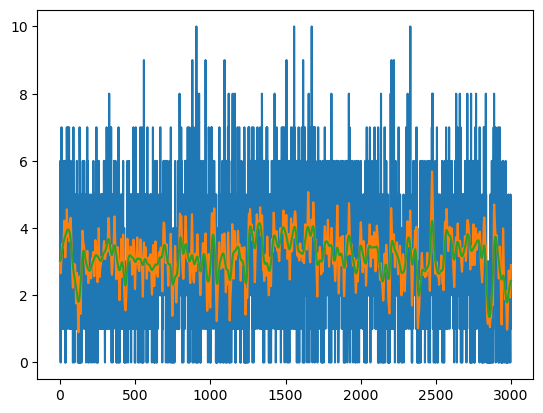

In [216]:
X = (t_bins/sample_rate).reshape(-1,1)
y = fr[241,:]


y3 = gaussian_filter1d(y, 3)
y6 = gaussian_filter1d(y, 10)

plt.plot(y[0:3000])
plt.plot(y3[0:3000])
plt.plot(y6[0:3000])

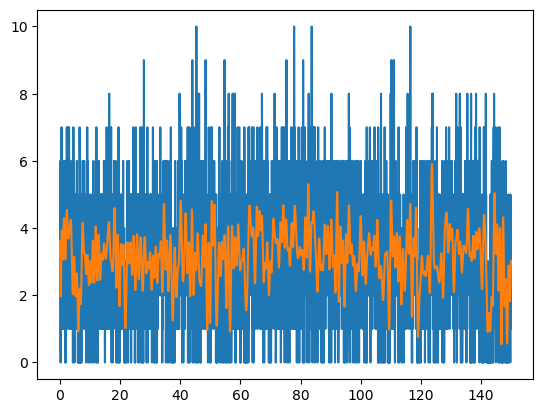

In [212]:
plt.plot(X[0:3000],y[0:3000])
plt.plot(X[0:3000],mean_prediction[0:3000])